In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from corner import corner

In [20]:
def kde_1D(x,data,scale_factor):
    cov = scale_factor
    estimate = 0
    for d in data:
        estimate += 1./np.sqrt(np.pi * 2 *cov**2 ) * np.exp( - .5 *(x-d)**2/cov**2)
    return estimate/(len(data))

In [35]:
def draw_from_1D_KDE(data, scale_factor, size):
    output = np.zeros(size)
    IDS = np.random.uniform(0,len(data),size)
    for x in np.arange(size):
        output[x] = np.random.normal(loc=data[int(IDS[x])], scale=scale_factor)
    return output

In [30]:
def kde(x,data,scale_factor):
    dim = len(data[0])
    cov = np.zeros((dim,dim))
    for d in np.arange(dim):
        cov[d][d] = scale_factor
    determinant = np.linalg.det(cov)
    estimate = 0
    for d in data:
        estimate += 1./np.sqrt(np.pi * 2 *determinant ) * np.exp( - .5 *( np.sum(np.dot(np.dot(x,cov),d))))
    return estimate

(20000,)
0.13797296614612148


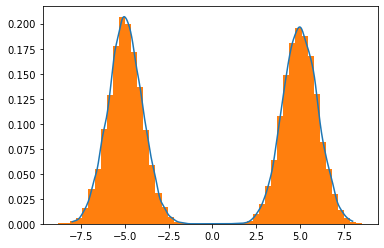

In [42]:
mean1= -5
cov1 = 1
data1 = np.random.normal(loc=mean1,scale=cov1,size=int(1e4))
mean2=5
cov2 =1
data2 = np.random.normal(loc=mean2,scale=cov2,size=int(1e4))
data = np.concatenate((data1,data2))
print(data.shape)

scale_factor = len(data)**(-1./(1 + 4))
print(scale_factor)

# fig = corner(data)
# plt.show()
# plt.close()

newx = np.linspace(-8,8,1000)
newy = kde_1D(newx, data, scale_factor)
plt.plot(newx,newy)
plt.hist(data,density=True,bins=50 )
plt.show()
plt.close()


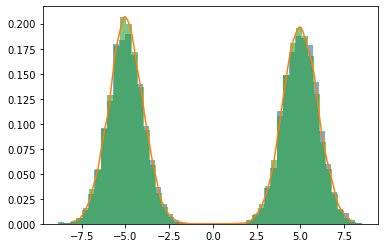

In [43]:
resample = draw_from_1D_KDE(data, scale_factor,int(1e4))
plt.hist(resample,bins=50,density=True,alpha=.6)
plt.plot(newx,newy)
plt.hist(data,density=True,bins=50,alpha=.6 )
plt.show()
plt.close()

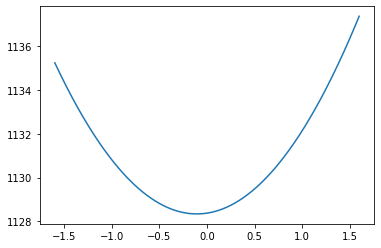

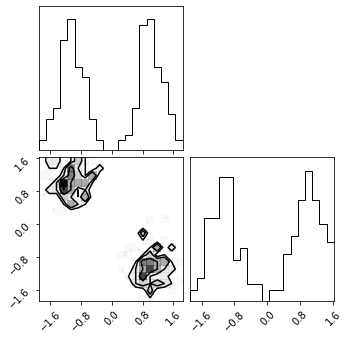

In [3]:
mean1= [1 , -1]
cov1 = [ [ .1,0],[0,.1]]
data1 = np.random.multivariate_normal(mean=mean1,cov=cov1,size=int(1e2))
mean2= [-1 , 1]
cov2 = [ [ .1,0],[0,.1]]
data2 = np.random.multivariate_normal(mean=mean2,cov=cov2,size=int(1e2))
data = np.concatenate((data1,data2),axis=0)
scale_factor = len(data)**(-1./( len(data[0] + 4)))

newx = np.linspace(-1.6,1.6,1000)
newy =np.linspace(1.6,-1.6,1000)
newdata = [ [newx[i], newy[i]] for i in np.arange(len(newx))]
newy = [kde(x,data,scale_factor ) for x in newdata]
plt.plot(newx, newy)

fig = corner(data)

